# Convolutional neural network

Dans le chapitre précédent, nous avons vu comment créer un réseau simple. Il s'agissait d'images simples contenant peu d'informations, en noir et blanc. Les motifs se répétaient assez souvent et les formes étaient assez simples. Mais ce type d'architecture ne fonctionnerait pas avec des images plus complexes, comme celle d'un chat par exemple. Le temps de calcul serait si long qu'il deviendrait inutilisable. 

Pour résoudre ce type de problème, il est préférable d'utiliser une architecture dite de convolution. C'est ce que nous allons voir dans ce chapitre.



## What is a convolutional ?

Une convolution est une opération qui transforme une fonction en quelque chose d'autre. Les convolutions permettent de transformer la fonction d'origine en une forme permettant d'obtenir davantage d'informations.

Les convolutions sont utilisées depuis longtemps dans le traitement des images pour les rendre floues et plus nettes, et pour effectuer d'autres opérations, telles que l'accentuation des bords et le gaufrage.

![Conv](./img/conv.jpg)

Ici, l'image originale est celle de gauche et la matrice de chiffres au milieu est la matrice de convolution ou le filtre.

Une opération de convolution est une opération de multiplication de matrice par éléments. L'une des matrices est l'image et l'autre est le filtre ou le noyau qui transforme l'image en quelque chose d'autre. La sortie de cette opération est l'image convoluée finale.

![schema](./img/schema.gif)

Si l'image est plus grande que la taille du filtre, nous faisons glisser le filtre vers les différentes parties de l'image et effectuons l'opération de convolution. À chaque fois, nous générons un nouveau pixel dans l'image de sortie.

Le nombre de pixels par lequel nous faisons glisser le noyau est connu sous le nom de "stride". Il est généralement fixé à 1, mais il est possible de l'augmenter. Dans ce cas, il peut être nécessaire d'augmenter la taille de l'image de quelques pixels pour faire tenir le noyau sur les bords de l'image. Cette augmentation est appelée "padding".

Je parlerai plus en détail de la façon dont cela peut nous aider à obtenir plus d'informations à partir d'une image dans une section ultérieure.

### CONVOLUTIONAL FILTERS IN MACHINE LEARNING

Les convolutions ne sont pas un concept nouveau. Elles sont utilisées depuis longtemps dans le traitement des images et des signaux. Toutefois, les convolutions utilisées dans l'apprentissage automatique sont différentes de celles utilisées dans le traitement d'images.

Dans le traitement d'images, il existe un ensemble de filtres qui sont utilisés pour effectuer certaines tâches. Par exemple, un filtre qui peut être utilisé pour rendre les images floues peut ressembler à ceci :

![filter 2](./img/filter2.png)



En revanche, un filtre qui fait l'inverse, c'est-à-dire qui accentue la netteté d'une image, ressemble à ceci :

![filter2](./img/04.jpg)

Other filters, like sobel filters, can perform an edge detection and other operations.
![filter 4](./img/05.jpg)

Dans les CNN, les filtres ne sont pas définis. La valeur de chaque filtre est apprise au cours du processus de formation.

En étant capables d'apprendre les valeurs des différents filtres, les CNN peuvent trouver plus de sens dans les images que les humains et les filtres conçus par des humains ne pourraient pas trouver.

Le plus souvent, les filtres d'une couche de convolution apprennent à détecter des concepts abstraits, tels que les contours d'un visage ou les épaules d'une personne. En empilant les couches de convolution les unes sur les autres, nous pouvons obtenir des informations plus abstraites et plus approfondies à partir d'un CNN.

Une deuxième couche de convolution pourrait être capable de détecter la forme des yeux ou les bords d'une épaule, etc. Cela permet également aux CNN d'effectuer un apprentissage hiérarchique des caractéristiques, ce qui correspond à la façon dont notre cerveau est censé identifier les objets.

![image 5](./img/06.jpg)

Dans l'image, on peut voir comment les différents filtres de chaque couche du CNN interprètent le chiffre 0.

C'est cette capacité des CNN à détecter des caractéristiques abstraites et complexes qui les rend si intéressants dans les problèmes de reconnaissance d'images.

Selon le type de problème que nous résolvons et les types de caractéristiques que nous essayons d'apprendre, nous utilisons différents types de convolutions.

#### The 2D convolution layer 
Le type de convolution le plus couramment utilisé est la couche de convolution 2D, généralement abrégée en conv2D. Un filtre ou un noyau dans une couche conv2D a une hauteur et une largeur. Ils sont généralement plus petits que l'image d'entrée et nous les déplaçons donc sur l'ensemble de l'image. La zone où le filtre se trouve sur l'image s'appelle le champ réceptif.

Fonctionnement : Les filtres Conv2D s'étendent sur les trois canaux d'une image (rouge, vert et bleu). Les filtres peuvent également être différents pour chaque canal. Après que les convolutions ont été effectuées individuellement pour chaque canal, elles sont additionnées pour obtenir l'image convoluée finale. La sortie d'un filtre après une opération de convolution est appelée carte de caractéristiques.

![image 7](./img/07.jpg)

Chaque filtre de cette couche est initialisé de manière aléatoire à une certaine distribution (normale, gaussienne, etc.). En ayant des critères d'initialisation différents, chaque filtre est entraîné légèrement différemment. Ils finissent par apprendre à détecter différentes caractéristiques de l'image.

S'ils étaient tous initialisés de la même manière, les chances que deux filtres apprennent des caractéristiques similaires augmenteraient considérablement. L'initialisation aléatoire garantit que chaque filtre apprend à identifier des caractéristiques différentes.

Étant donné que chaque filtre conv2D apprend une caractéristique distincte, nous en utilisons plusieurs dans une seule couche pour identifier différentes caractéristiques. Le plus intéressant est que chaque filtre est appris automatiquement.

Chacun de ces filtres est utilisé comme entrée dans la couche suivante du réseau neuronal.

S'il y a 8 filtres dans la première couche et 32 dans la seconde, chaque filtre de la seconde couche voit 8 entrées de filtre. Cela signifie que nous obtenons 32X8 cartes de caractéristiques dans la deuxième couche. Chacune des 8 cartes de caractéristiques d'un seul filtre est additionnée pour obtenir une seule sortie de chaque couche.

**What the conv2D layer is doing:**  

Chaque filtre de la couche conv2D est une matrice de nombres. La matrice correspond à un motif ou à une caractéristique recherchée par le filtre.

Dans l'image ci-dessous, le filtre recherche une ligne courbe. Cette ligne courbe peut correspondre au dos d'une souris ou à une partie des chiffres 8, 9, 0, etc. Chaque fois que le filtre rencontre un tel motif dans l'image, il produit un résultat élevé.


![image 8](./img/08.jpg)

Bien que cet exemple puisse sembler très simple, la plupart des filtres conv2D de la première couche d'un CNN recherchent des caractéristiques similaires. Cela signifie également que le même filtre peut être utilisé pour extraire des informations de plusieurs types d'images (souris, nombres, visages, etc.).

**Where the conv2D layer is used:**  

Ils sont utilisés dans les premières couches convolutives d'un CNN pour extraire des caractéristiques simples. Ils ont également été utilisés dans les réseaux de capsules. Auparavant, ils étaient les seuls filtres utilisés et constituaient la majeure partie d'un CNN. Par exemple, l'architecture LeNet originale et l'architecture AlexNet utilisaient principalement des filtres conv2D.

Aujourd'hui, grâce aux progrès réalisés dans le domaine des couches convolutives et des filtres, des filtres plus sophistiqués ont été conçus, qui peuvent servir à différentes fins et être utilisés pour différentes applications. Nous en examinerons quelques-uns plus loin.

**How to use them while designing a CNN:**  


Les filtres Conv2D sont utilisés uniquement dans les couches initiales d'un réseau neuronal convolutif. Ils sont placés là pour extraire les caractéristiques initiales de haut niveau d'une image.

Bien qu'il existe de nombreuses règles empiriques pour la conception de ces filtres, ils sont généralement empilés avec un nombre croissant de filtres dans chaque couche. Chaque couche successive peut comporter deux à quatre fois le nombre de filtres de la couche précédente. Cela permet au réseau d'apprendre des caractéristiques hiérarchiques.

**Limitations of the conv2D layer:**   

La couche conv2D fonctionne de manière assez impressionnante. Cependant, elle présente certaines limites, ce qui a incité les chercheurs à trouver des alternatives à la couche conv2D.

Leur principale limite est qu'ils sont très coûteux en termes de calcul. Le calcul d'un filtre conv2D de grande taille prend beaucoup de temps et l'empilement de plusieurs d'entre eux en couches augmente le nombre de calculs.

Une solution simple consiste à réduire la taille des filtres et à augmenter les pas. Bien que cela soit possible, cela réduit également le champ réceptif effectif du filtre et la quantité d'informations qu'il peut capturer. En fait, dans le premier article sur les réseaux convolutifs, Yann Le Cunn avait mentionné sa crainte d'avoir un filtre convolutif de 1x1.

Cependant, avant d'examiner les autres types de convolutions, il est préférable d'avoir une compréhension plus intuitive des filtres.

Les couches Conv2D sont généralement utilisées pour obtenir une grande précision dans les tâches de reconnaissance d'images. Cependant, elles nécessitent de nombreux calculs et sont très gourmandes en mémoire vive.

Les convolutions diluées ou astrales réduisent la complexité de l'opération de convolution. Cela signifie qu'elles peuvent être utilisées dans des applications en temps réel et dans des applications où la puissance de traitement est moindre, comme dans les smartphones.

**Polling layer**

Remarque : la mise en commun n'est pas une couche convolutive, mais nous en parlons ici, car il s'agit d'une couche couramment utilisée dans les CNN.

La couche de mise en commun a été introduite pour deux raisons principales : La première est d'effectuer un sous-échantillonnage, c'est-à-dire de réduire la quantité de calculs à effectuer, et la seconde est de n'envoyer que les données importantes aux couches suivantes des CNN.

Comment cela fonctionne-t-il ? Il existe deux types de couches de mise en commun : la mise en commun maximale et la mise en commun moyenne.

Dans le cas du pooling max, nous ne prenons que la valeur du pixel le plus grand parmi tous les pixels du champ réceptif du filtre. Dans le cas du pooling moyen, nous prenons la moyenne de toutes les valeurs du champ réceptif.

![image11](./img/11.jpg)

Il existe de nombreux arguments pour déterminer lequel est le meilleur et de nombreuses règles empiriques pour savoir quand l'utiliser, mais, en général, le pooling max est plus couramment utilisé.

Étant donné que nous essayons de réduire l'échantillonnage du vecteur d'entrée, les noyaux de pooling ne se chevauchent pas, c'est-à-dire qu'ils ont un pas plus grand que la taille du noyau lui-même.

**Limitations of the Pooling layer:** 

Le déséchantillonnage par pooling pose de nombreux problèmes aux CNN.

La couche de mise en commun perd des informations sur la position des différents objets dans l'image. C'est pourquoi de nombreuses nouvelles architectures ont cessé d'utiliser la couche de mise en commun.

La couche de mise en commun a été introduite pour réduire le temps de calcul et la complexité en réduisant le nombre de paramètres. Avec l'augmentation de la puissance de calcul et la présence de meilleures méthodes de sous-échantillonnage, comme les convolutions séparables et dilatées, la couche de mise en commun peut être mise de côté.


## Let us look at this in a more concrete way. 

Nous allons étudier les paramètres de la classe Conv2D de Keras, et nous verrons les paramètres les plus importants que vous devez régler lorsque vous entraînez vos propres réseaux neuronaux convolutifs (CNN). Nous allons ensuite utiliser la classe Conv2D de Keras pour implémenter un CNN simple. Nous allons ensuite entraîner et évaluer ce CNN sur l'ensemble de données CIFAR-10.

**Objectifs**

1. Déterminer rapidement si vous avez besoin d'utiliser un paramètre spécifique de la classe Conv2D de Keras.
2. Décider d'une valeur appropriée pour ce paramètre spécifique
3. Entraîner efficacement votre propre réseau neuronal convolutif
 



Let’s go ahead and get started!

## The Keras Conv2D class
The Keras Conv2D class constructor has the following signature:

````python
model.add(Conv2D(filters, kernel_size, strides=(1, 1),
  padding='valid', data_format=None, dilation_rate=(1, 1),
  activation=None, use_bias=True, kernel_initializer='glorot_uniform',
  bias_initializer='zeros', kernel_regularizer=None,
  bias_regularizer=None, activity_regularizer=None,
  kernel_constraint=None, bias_constraint=None))
````

Looks a bit overwhelming, right?

How in the world are you supposed to properly set these values?

No worries — let’s examine each of these parameters individually, giving you a strong understanding of not only what each parameter controls but also how to properly set each parameter as well.

### Filters

![image filter](./img/filters.png)
> **Figure 1:** The Keras Conv2D parameter, filters determines the number of kernels to convolve with the input volume. Each of these operations produces a 2D activation map.

The first required Conv2D parameter is the number of filters  that the convolutional layer will learn.

Layers early in the network architecture (i.e., closer to the actual input image) learn fewer convolutional filters while layers deeper in the network (i.e., closer to the output predictions) will learn more filters.

Conv2D layers in between will learn more filters than the early Conv2D layers but fewer filters than the layers closer to the output. Let’s go ahead and take a look at an example:

````python 
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Activation("softmax"))
````

Sur la ligne 1, nous apprenons un total de 32 filtres. Le regroupement maximal est ensuite utilisé pour réduire les dimensions spatiales du volume de sortie.

Nous apprenons ensuite 64 filtres à la ligne 4. Une fois de plus, le regroupement maximal est utilisé pour réduire les dimensions spatiales.

La couche Conv2D finale apprend 128 filtres.

Remarquez qu'à mesure que notre volume spatial de sortie diminue, le nombre de filtres appris augmente. Il s'agit d'une pratique courante dans la conception d'architectures CNN et je vous recommande d'en faire autant. En ce qui concerne le choix du nombre approprié de filtres, je recommande presque toujours d'utiliser des puissances de 2 comme valeurs.

Vous devrez peut-être adapter la valeur exacte en fonction (1) de la complexité de votre ensemble de données et (2) de la profondeur de votre réseau neuronal, mais je recommande de commencer par des filtres de l'ordre de [32, 64, 128] dans les premières couches et d'augmenter jusqu'à [256, 512, 1024] dans les couches plus profondes.

Encore une fois, la plage exacte des valeurs peut être différente pour vous, mais commencez par un plus petit nombre de filtres et n'augmentez qu'en cas de besoin.

### Kernel size
![image 12](./img/12.png)
> **Figure 2:** The Keras deep learning Conv2D parameter, filter_size, determines the dimensions of the kernel. Common dimensions include 1×1, 3×3, 5×5, and 7×7 which can be passed as (1, 1), (3, 3), (5, 5), or (7, 7) tuples.

Le deuxième paramètre que vous devez fournir à la classe Conv2D de Keras est le kernel_size , un doublet spécifiant la largeur et la hauteur de la fenêtre de convolution 2D.

La taille_du_noyau doit être un entier impair.

Les valeurs typiques de kernel_size sont les suivantes : (1, 1) , (3, 3) , (5, 5) , (7, 7) . Il est rare de voir des tailles de noyau supérieures à 7×7.

Alors, quand utiliser chacun d'entre eux ?

Si vos images d'entrée sont supérieures à 128×128, vous pouvez choisir d'utiliser une taille de noyau > 3 pour aider (1) à apprendre des filtres spatiaux plus grands et (2) à réduire la taille du volume.

D'autres réseaux, tels que VGGNet, utilisent exclusivement des filtres (3, 3) dans l'ensemble du réseau.

Des architectures plus avancées comme Inception, ResNet et SqueezeNet conçoivent des micro-architectures entières qui sont des "modules" à l'intérieur du réseau qui apprennent des caractéristiques locales à différentes échelles (c'est-à-dire 1×1, 3×3 et 5×5) et combinent ensuite les résultats.

Le module Inception ci-dessous en est un bon exemple :

![image13](./img/13.png)
> **Figure 3:** The Inception/GoogLeNet CNN architecture uses “micro-architecture” modules inside the network that learn local features at different scales (filter_size) and then combine the outputs.


The Residual module in the ResNet architecture uses 1×1 and 3×3 filters as a form of dimensionality reduction which helps to keep the number of parameters in the network low (or as low as possible given the depth of the network):

![image13](./img/14.png)
> **Figure 4:** The ResNet “Residual module” uses 1×1 and 3×3 filters for dimensionality reduction. This helps keep the overall network smaller with fewer parameters.

**So, how should you choose your filter_size ?**

First, examine your input image — is it larger than 128×128?

If so, consider using a 5×5 or 7×7 kernel to learn larger features and then quickly reduce spatial dimensions — then start working with 3×3 kernels:

````python
model.add(Conv2D(32, (7, 7), activation="relu"))
...
model.add(Conv2D(32, (3, 3), activation="relu"))

````

If your images are smaller than 128×128 you may want to consider sticking with strictly 1×1 and 3×3 filters.


### Strides

The strides  parameter is a 2-tuple of integers, specifying the “step” of the convolution along the x and y axis of the input volume.

The strides  value defaults to (1, 1) , implying that:

A given convolutional filter is applied to the current location of the input volume
The filter takes a 1-pixel step to the right and again the filter is applied to the input volume
This process is performed until we reach the far-right border of the volume in which we move our filter one pixel down and then start again from the far left
Typically you’ll leave the strides  parameter with the default (1, 1)  value; however, you may occasionally increase it to (2, 2)  to help reduce the size of the output volume (since the step size of the filter is larger).

Typically you’ll see strides of 2×2 as a replacement to max pooling:

```python
model.add(Conv2D(128, (3, 3), strides=(1, 1), activation="relu"))
model.add(Conv2D(128, (3, 3), strides=(1, 1), activation="relu"))
model.add(Conv2D(128, (3, 3), strides=(2, 2), activation="relu"))
```

Here we can see our first two Conv2D layers have a stride of 1×1. The final Conv2D layer; however, takes the place of a max pooling layer, and instead reduces the spatial dimensions of the output volume via strided convolution.

In 2014, Springenber et al. published a paper entitled Striving for Simplicity: [The All Convolutional](https://arxiv.org/abs/1412.6806) Net which demonstrated that replacing pooling layers with strided convolutions can increase accuracy in some situations.

ResNet, a popular CNN, has embraced this finding — if you ever look at the source code to a ResNet implementation (or implement it yourself), you’ll see that ResNet replies on strided convolution rather than max pooling to reduce spatial dimensions in between residual modules.

### Padding

![image15](./img/15.gif)
> **Figure 5:** A 3×3 kernel applied to an image with padding. The Keras Conv2D padding parameter accepts either "valid" (no padding) or "same" (padding + preserving spatial dimensions). This animation was contributed to StackOverflow [(source)](https://stackoverflow.com/questions/52067833/how-to-plot-an-animated-matrix-in-matplotlib).

The padding  parameter to the Keras Conv2D class can take on one of two values: valid  or same .

With the valid  parameter the input volume is not zero-padded and the spatial dimensions are allowed to reduce via the natural application of convolution.

The following example would naturally reduce the spatial dimensions of our volume:

```Python
model.add(Conv2D(32, (3, 3), padding="valid"))
```

If you instead want to preserve the spatial dimensions of the volume such that the output volume size matches the input volume size, then you would want to supply a value of same  for the padding :

```Python
model.add(Conv2D(32, (3, 3), padding="same"))
```

While the default Keras Conv2D value is valid  I will typically set it to same  for the majority of the layers in my network and then either reduce spatial dimensions of my volume by either:  

1. Max pooling
2. Strided convolution

I would recommend that you use a similar approach to padding with the Keras Conv2D class as well.

### data_format

![image 16](./img/16.png)
> **Figure 6:** Keras, as a high-level framework, supports multiple deep learning backends. Thus, it includes support for both “channels last” and “channels first” channel ordering.



The data format value in the Conv2D class can be either channels_last  or channels_first :

- The TensorFlow backend to Keras uses channels last ordering.
- The Theano backend uses channels first ordering.

You typically shouldn’t have to ever touch this value as Keras for two reasons:

1. You are more than likely using the TensorFlow backend to Keras
2. And if not, you’ve likely already updated your ~/.keras/keras.json  configuration file to set your backend and associated channel ordering

My advice is to never explicitly set the data_format  in your Conv2D class unless you have a very good reason to do so.

### dilation_rate 

![image 17](./img/17.png)
> **Figure 7:** The Keras deep learning Conv2D parameter, dilation_rate, accepts a 2-tuple of integers to control dilated convolution [(source)](http://www.erogol.com/dilated-convolution/).

The dilation_rate  parameter of the Conv2D class is a 2-tuple of integers, controlling the dilation rate for dilated convolution. Dilated convolution is a basic convolution only applied to the input volume with defined gaps, as Figure 7 above demonstrates.

You may use dilated convolution when:

You are working with higher resolution images but fine-grained details are still important
You are constructing a network with fewer parameters
Discussing dilated convolution is outside the scope of this tutorial so if you are interested in learning more, please [refer to this tutorial](https://medium.com/@erogol/small-notes-on-dilated-convolution-abdcae62e8ea).

### activation 
![activation](./img/18.png)
> **Figure 8:** Keras provides a number of common activation functions. The activation parameter to Conv2D is a matter of convenience and allows the activation function for use after convolution to be specified.



The activation  parameter to the Conv2D class is simply a convenience parameter, allowing you to supply a string specifying the name of the activation function you want to apply after performing the convolution.

In the following example we perform convolution and then apply a ReLU activation function:  

````python
model.add(Conv2D(32, (3, 3), activation="relu"))

````

The above code is equivalent to:

````python
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
````
Use the activation  parameter if you and if it helps keep your code cleaner — it’s entirely up to you and won’t have an impact on the performance of your Convolutional Neural Network.


### use_bias
The use_bias  parameter of the Conv2D class controls whether a bias vector is added to the convolutional layer.

Typically you’ll want to leave this value as True , although some implementations of ResNet will leave the bias parameter out.

I recommend keep the bias unless you have a good reason not to.

### kernel_initializer and bias_initializer
![19](./img/19.png)

> **Figure 9:** Keras offers a number of initializers for the Conv2D class. Initializers can be used to help train deeper neural networks more effectively.

The kernel_initializer  controls the initialization method used to initialize all values in the Conv2D class prior to actually training the network.

Similarly, the bias_initializer  controls how the bias vector is initialized before training starts.

A full list of initializers can be found in the Keras documentation; however, here is what I recommend:

1. Leave the bias_initialization  alone — it will by default filled with zeros (you’ll rarely if ever, have to change the bias initialization method.  


2. The kernel_initializer  defaults to glorot_uniform , the Xavier Glorot uniform initialization method, which is perfectly fine for the majority of tasks; however, for deeper neural networks you may want to use  he_normal  (MSRA/He et al. initialization) which works especially well when your network has a large number of parameters (i.e., VGGNet).


### kernel_regularizer, bias_regularizer, and activity_regularizer
![20](./img/20.png)

> **Figure 10:** Regularization hyperparameters should be adjusted especially when working with large datasets and really deep networks. The kernel_regularizer parameter in particular is one that I adjust often to reduce overfitting and increase the ability for a model to generalize to unfamiliar images.

The kernel_regularizer , bias_regularizer , and activity_regularizer  control the type and amount of regularization method applied to the Conv2D layer.

Applying regularization helps you to:

1. Reduce the effects of overfitting
2. Increase the ability of your model to generalize

**When working with large datasets and deep neural networks applying regularization is typically a must.**

Normally you’ll encounter either L1 or L2 regularization being applied — I will use L2 regularization on my networks if I detect signs of overfitting:

```python
from keras.regularizers import l2
...
model.add(Conv2D(32, (3, 3), activation="relu"),
	kernel_regularizer=l2(0.0005))
```


The amount of regularization you apply is a hyperparameter you will need to tune for your own dataset, but I find values of 0.0001-0.001 are good ranges to start with.

I would suggest leaving your bias regularizer alone — regularizing the bias typically has very little impact on reducing overfitting.

I also suggest leaving the activity_regularizer  at its default value (i.e., no activity regularization).

While weight regularization methods operate on weights themselves, f(W), where f is the activation function and W are the weights, an activity regularizer instead operates on the outputs, f(O), where O is the outputs of a layer.

Unless there is a very specific reason you’re looking to regularize the output it’s best to leave this parameter alone.


### kernel_constraint and bias_constraint

The final two parameters to the Keras Conv2D class are the kernel_constraint  and bias_constraint .

These parameters allow you to impose constraints on the Conv2D layer, including non-negativity, unit normalization, and min-max normalization.

You can see the full list of supported constraints in the Keras documentation.

Again, I would recommend leaving both the kernel constraint and bias constraint alone unless you have a specific reason to impose constraints on the Conv2D layer.

## CIFAR-10 Photo Classification Dataset
CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

CIFAR-10 is a well-understood dataset and widely used for benchmarking computer vision algorithms in the field of machine learning. The problem is “solved.” It is relatively straightforward to achieve 80% classification accuracy. Top performance on the problem is achieved by deep learning convolutional neural networks with a classification accuracy above 90% on the test dataset.


### Import plug-in

In [28]:
# example of loading the cifar10 dataset
from matplotlib import pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers 
import tensorflow as tf
import numpy as np

#tf.logging.set_verbosity(tf.logging.ERROR) # this line is for hiding the futerwarning of tensorflow

### As a good practice suggests, we need to declare our variables:

- *batch_size* – the number of training examples in one forward/ backwards pass. The higher the batch size, the more memory space you’ll need
- *num_classes* – number of cifar-10 dataset classes
- *one epoch* – one forward pass and one backward pass of all the training examples
- *class_names* – an array includes all 10 class names

In [29]:
# Declare variables
batch_size = 32 # 32 examples in a mini-batch, smaller batch size means more updates in one epoch
num_classes = 10 # number of outputs possible
epochs =  50 # repeat 
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"]

### Load the dataset

In [30]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Print figure with 10 random images from the CIFAR-10 dataset.

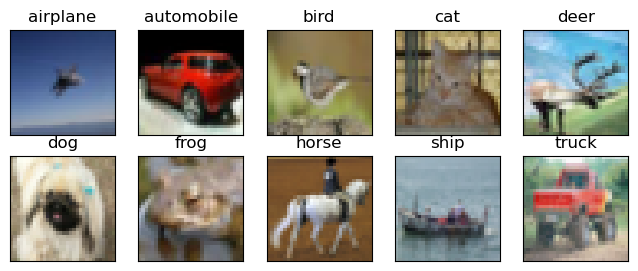

In [31]:
# Print figure with 10 random images from each
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(0,1,2))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### Normalized data
It’s good practice to work with normalized data.

Because the input values are well understood, we can easily normalize to the range 0 to 1 by dividing each value by the maximum observation which is 255.

Note, the data is loaded as integers, so we must cast it to float point values in order to perform the division.

**Exercise :** 
1. Cast x_train & x_test in ``float32``.
2. Normalize the data so that they have a value in 0 and 1

In [32]:
### Enter your code here (4 lines)



### End

**Exercise :** Transform y data into categorical data

In [25]:
### Enter your code here (2 lines)



In [26]:
# Summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


### Let’s start by defining a simple CNN model. *(4 layers)*

We will use a model with four convolutional layers followed by max pooling and a flattening out of the network to fully connected layers to make predictions:

1. Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
2. Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
3. Max Pool layer with size 2×2
4. Dropout set to 25%
5. Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
6. Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
7. Max Pool layer with size 2×2
8. Dropout set to 25%
9. Flatten layer
10. Fully connected layer with 512 units and a rectifier activation function
11. Dropout set to 50%
12. Fully connected output layer with 10 units and a softmax activation function

A logarithmic loss function is used with the stochastic gradient descent (SGD) optimization algorithm configured with a large momentum and weight decay start with a learning rate of 0.1.

Then we can fit this model with 50 epochs and a batch size of 32.
 

In [2]:
def model_4_layers():
 
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu')) # Layer 1
    model.add(Conv2D(32,(3, 3), activation='relu' )) # Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu')) # Layer 3
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu')) # Layer 4
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512,activation='relu' ))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

cnn_4 = model_4_layers()

NameError: name 'Sequential' is not defined

We can see a summary of the model

In [3]:
cnn_4.summary()

NameError: name 'cnn_4' is not defined

### Fit the model
![https://www.theux.be/fr/ma-commune/services-communaux/attention.jpg/@@images/image.jpeg](https://www.theux.be/fr/ma-commune/services-communaux/attention.jpg/@@images/image.jpeg)
Be careful, training the model with convolution networks is resource-intensive.  
If you have a good graphics card it is then better to configure your python environment to use your gpu. 

In my case, a "gpu" environment was already preconfigured with Anaconda. If this is not your case, you will have to do a small google search.

The time saving is not negligible, by doing tests, I could see that the training was done 5 times faster using the gpu. (21 seconds per epoch instead of 110 seconds)

#### Let's go !

In [4]:
cnn4 = cnn_4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), shuffle=True)

NameError: name 'cnn_4' is not defined

In [5]:
scores4l = cnn_4.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores4l[1]*100))

NameError: name 'cnn_4' is not defined

**My scrore**  
Accuracy: 79.73%  
Epochs : 50  
Btach_size : 32  
Time : 17 min  
GPU : GTX 1050  

### Save your model

In [6]:
cnn_4.save("cnn4.h5")

NameError: name 'cnn_4' is not defined

### Display histogram

In [7]:
plt.plot(cnn4.history['loss'], label='Train Loss')
plt.plot(cnn4.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

NameError: name 'cnn4' is not defined

In [8]:
plt.plot(cnn4.history['acc'], label='Train accuracy')
plt.plot(cnn4.history['val_acc'], label='Validation accuracy')
plt.legend()
plt.show()

NameError: name 'cnn4' is not defined

We can see that there is overfiting from the 15th epochs.   
So there is no need to continue beyond that with this model and this dataset and the risk of over-interpretation.

### The second variant for 6 Layer model

1. Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
2. Dropout set to 20%
3. Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
4. Max Pool layer with size 2×2
5. Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
6. Dropout set to 20%
7. Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
8. Max Pool layer with size 2×2
9. Convolutional input layer, 128 feature maps with a size of 3×3, a rectifier activation function
10. Dropout set to 20%
11. Convolutional input layer, 128 feature maps with a size of 3×3, a rectifier activation function
12. Max Pool layer with size 2×2
13. Flatten layer
14. Dropout set to 20%
15. Fully connected layer with 1024 units and a rectifier activation function and a weight constraint of max norm set to 3
16. Dropout set to 20%
17. Fully connected output layer with 10 units and a softmax activation function

**Exercise :** Create the 6-layer model following the instructions above.

In [9]:
def model_6_layers():
    
    model = Sequential()
    ### Enter your code here (+- 17 lines)
    #### layer 1 : (2 lines)
   

    #### layer 2 : (2 lines)
   

    #### layer 3 : (2 lines)

    
    #### layer 4 : (2 lines)
  

    #### layer 5 : (2 lines)
  

    #### layer 6 : (2 lines)
 

    
    #### Output (+- 5 lines)
 



    ### End of your code 
    
    # Compile model 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

cnn_6 = model_6_layers()

NameError: name 'Sequential' is not defined

**Exercice :** Display the summary of the model

In [10]:
### Enter ypur code here (1 line)


**You should do something like this:**

````
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_39 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_30 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_31 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
dropout_32 (Dropout)         (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_34 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                10250     
=================================================================
Total params: 2,395,434
Trainable params: 2,395,434
Non-trainable params: 0
_________________________________________________________________

````

**Exercise :** Fit the model with 15 epochs

In [11]:
### Enter your code here (1 line) 


### Save your model 

**Exercise :** Save your model 

In [12]:
### Enter your code here (1 line) 


### Display histogram 

**Exercise :** Display histogram with loss and accuracy data in ``cnn6``.

In [13]:
### Display LOSS 
### Enter your code here (+- 4 lines)




### Display ACCURACY
### Enter your code here (+- 4 lines)




### END

In [14]:
scores6l = cnn_6.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores6l[1]*100))

NameError: name 'cnn_6' is not defined

**My score :**  
Accuracy: 77.89%  
Epochs : 15  
Btach_size : 32  
Time : 8 min  
GPU : GTX 1050   

### Augment the dataset 
Last but not least, we have to augment the pictures with the help of a Keras native library ImageDataGenerator. Essentially, you manipulate the pictures in order to cover more ground. It rotates, flipping and shifting the pictures and generates “distorted” images from the initial dataset. You can find more information about this technique here. Finally, we have to compile the model and train the algorithm.

In [ ]:
def fit_data_augmentation(model, data_augmentation = True, epochs = epochs, batch_s = batch_size):

    if not data_augmentation:
        print('Not using data augmentation.')
        model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(x_test, y_test),
                  shuffle=True)
    else:
        print('Using real-time data augmentation.')
        # This will do preprocessing and realtime data augmentation:
        datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            zca_epsilon=1e-06,  # epsilon for ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            # randomly shift images horizontally (fraction of total width)
            width_shift_range=0.1,
            # randomly shift images vertically (fraction of total height)
            height_shift_range=0.1,
            shear_range=0.,  # set range for random shear
            zoom_range=0.5,  # set range for random zoom
            channel_shift_range=0.,  # set range for random channel shifts
            # set mode for filling points outside the input boundaries
            fill_mode='nearest',
            cval=0.,  # value used for fill_mode = "constant"
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False,  # randomly flip images
            # set rescaling factor (applied before any other transformation)
            rescale=None,
            preprocessing_function=None,
            # image data format, either "channels_first" or "channels_last"
            data_format=None,
            # fraction of images reserved for validation (strictly between 0 and 1)
            validation_split=0.0)

        # Compute quantities required for feature-wise normalization
        # (std, mean, and principal components if ZCA whitening is applied).
        datagen.fit(x_train)

        # Fit the model on the batches generated by datagen.flow().
        model.fit_generator(datagen.flow(x_train, y_train,
                                         batch_size=batch_s),
                            steps_per_epoch=len(x_train) / batch_s,
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            workers=4)
        return model

In [ ]:
fit_data_augmentation(cnn_4)

### Limits overfiting with Early Stopping

Keras supports the early stopping of training via a callback called EarlyStopping.

This callback allows you to specify the performance measure to monitor, the trigger, and once triggered, it will stop the training process.

The EarlyStopping callback is configured when instantiated via arguments.

The “monitor” allows you to specify the performance measure to monitor in order to end training. Recall from the previous section that the calculation of measures on the validation dataset will have the ‘val_‘ prefix, such as ‘val_loss‘ for the loss on the validation dataset.

````python 
es = EarlyStopping(monitor='val_loss')
````

Based on the choice of performance measure, the “mode” argument will need to be specified as whether the objective of the chosen metric is to increase (maximize or ‘max‘) or to decrease (minimize or ‘min‘).

For example, we would seek a minimum for validation loss and a minimum for validation mean squared error, whereas we would seek a maximum for validation accuracy. 

````python 
es = EarlyStopping(monitor='val_loss', mode='min')
````
By default, mode is set to ‘auto‘ and knows that you want to minimize loss or maximize accuracy.

That is all that is needed for the simplest form of early stopping. Training will stop when the chosen performance measure stops improving. To discover the training epoch on which training was stopped, the “verbose” argument can be set to 1. Once stopped, the callback will print the epoch number.

````python
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
````
Often, the first sign of no further improvement may not be the best time to stop training. This is because the model may coast into a plateau of no improvement or even get slightly worse before getting much better.

We can account for this by adding a delay to the trigger in terms of the number of epochs on which we would like to see no improvement. This can be done by setting the “patience” argument.

````python
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
````
The exact amount of patience will vary between models and problems. Reviewing plots of your performance measure can be very useful to get an idea of how noisy the optimization process for your model on your data may be.

By default, any change in the performance measure, no matter how fractional, will be considered an improvement. You may want to consider an improvement that is a specific increment, such as 1 unit for mean squared error or 1% for accuracy. This can be specified via the “min_delta” argument.

````python
es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)
````

We can then update the call to the fit() function and specify a list of callbacks via the **“callback”** argument.
````python
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
````

In [ ]:
# Run this cell
from keras.callbacks import EarlyStopping

cnn_4 = model_4_layers()
cnn_4.summary()
es = EarlyStopping(monitor='val_loss', mode='min',  verbose=1, patience=5)
history = cnn_4.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4000, verbose=1, callbacks=[es])

There you go!  
As soon as keras notices that the val_loss no longer decreases 5 times in a row, he will stop the training

### Save your best model ! 

There is one last thing we need to do. Save the best model. Indeed, the last trained model is not necessarily the best.  To do this we will use the ``ModelCheckpoint()`` method which will allow us to save only the best trained model. 


In [ ]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = cnn_4.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4000, verbose=1, callbacks=[es, mc])